### DACON latdefiance20님의 코드공유 자료를 참조하여 작성하였습니다.

In [106]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Path = os.path.dirname(os.path.dirname(os.getcwd())) 
Path_R = Path + "//DACON//Data//Data(ACSP_B)"
print(os.listdir(Path_R))

['sample_submission.csv', 'test.csv', 'train.csv']


In [107]:
train = pd.read_csv(Path_R + "//train.csv")
test = pd.read_csv(Path_R + "//test.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 3000 non-null   int64  
 1   Gender                             3000 non-null   object 
 2   Customer Type                      3000 non-null   object 
 3   Age                                3000 non-null   int64  
 4   Type of Travel                     3000 non-null   object 
 5   Class                              3000 non-null   object 
 6   Flight Distance                    3000 non-null   int64  
 7   Seat comfort                       3000 non-null   int64  
 8   Departure/Arrival time convenient  3000 non-null   int64  
 9   Food and drink                     3000 non-null   int64  
 10  Gate location                      3000 non-null   int64  
 11  Inflight wifi service              3000 non-null   int64

In [108]:
train.isna().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
target                               0
dtype: int64

In [109]:
print(train.columns)
train.head()

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'target'],
      dtype='object')


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,1,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,...,4,5,4,4,4,5,4,0,0.0,0
1,2,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,...,5,5,4,2,1,5,2,18,18.0,0
2,3,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,...,4,4,4,4,5,4,3,0,0.0,1
3,4,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,...,3,2,4,5,3,4,3,10,2.0,0
4,5,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,...,4,4,4,4,4,4,5,0,0.0,1


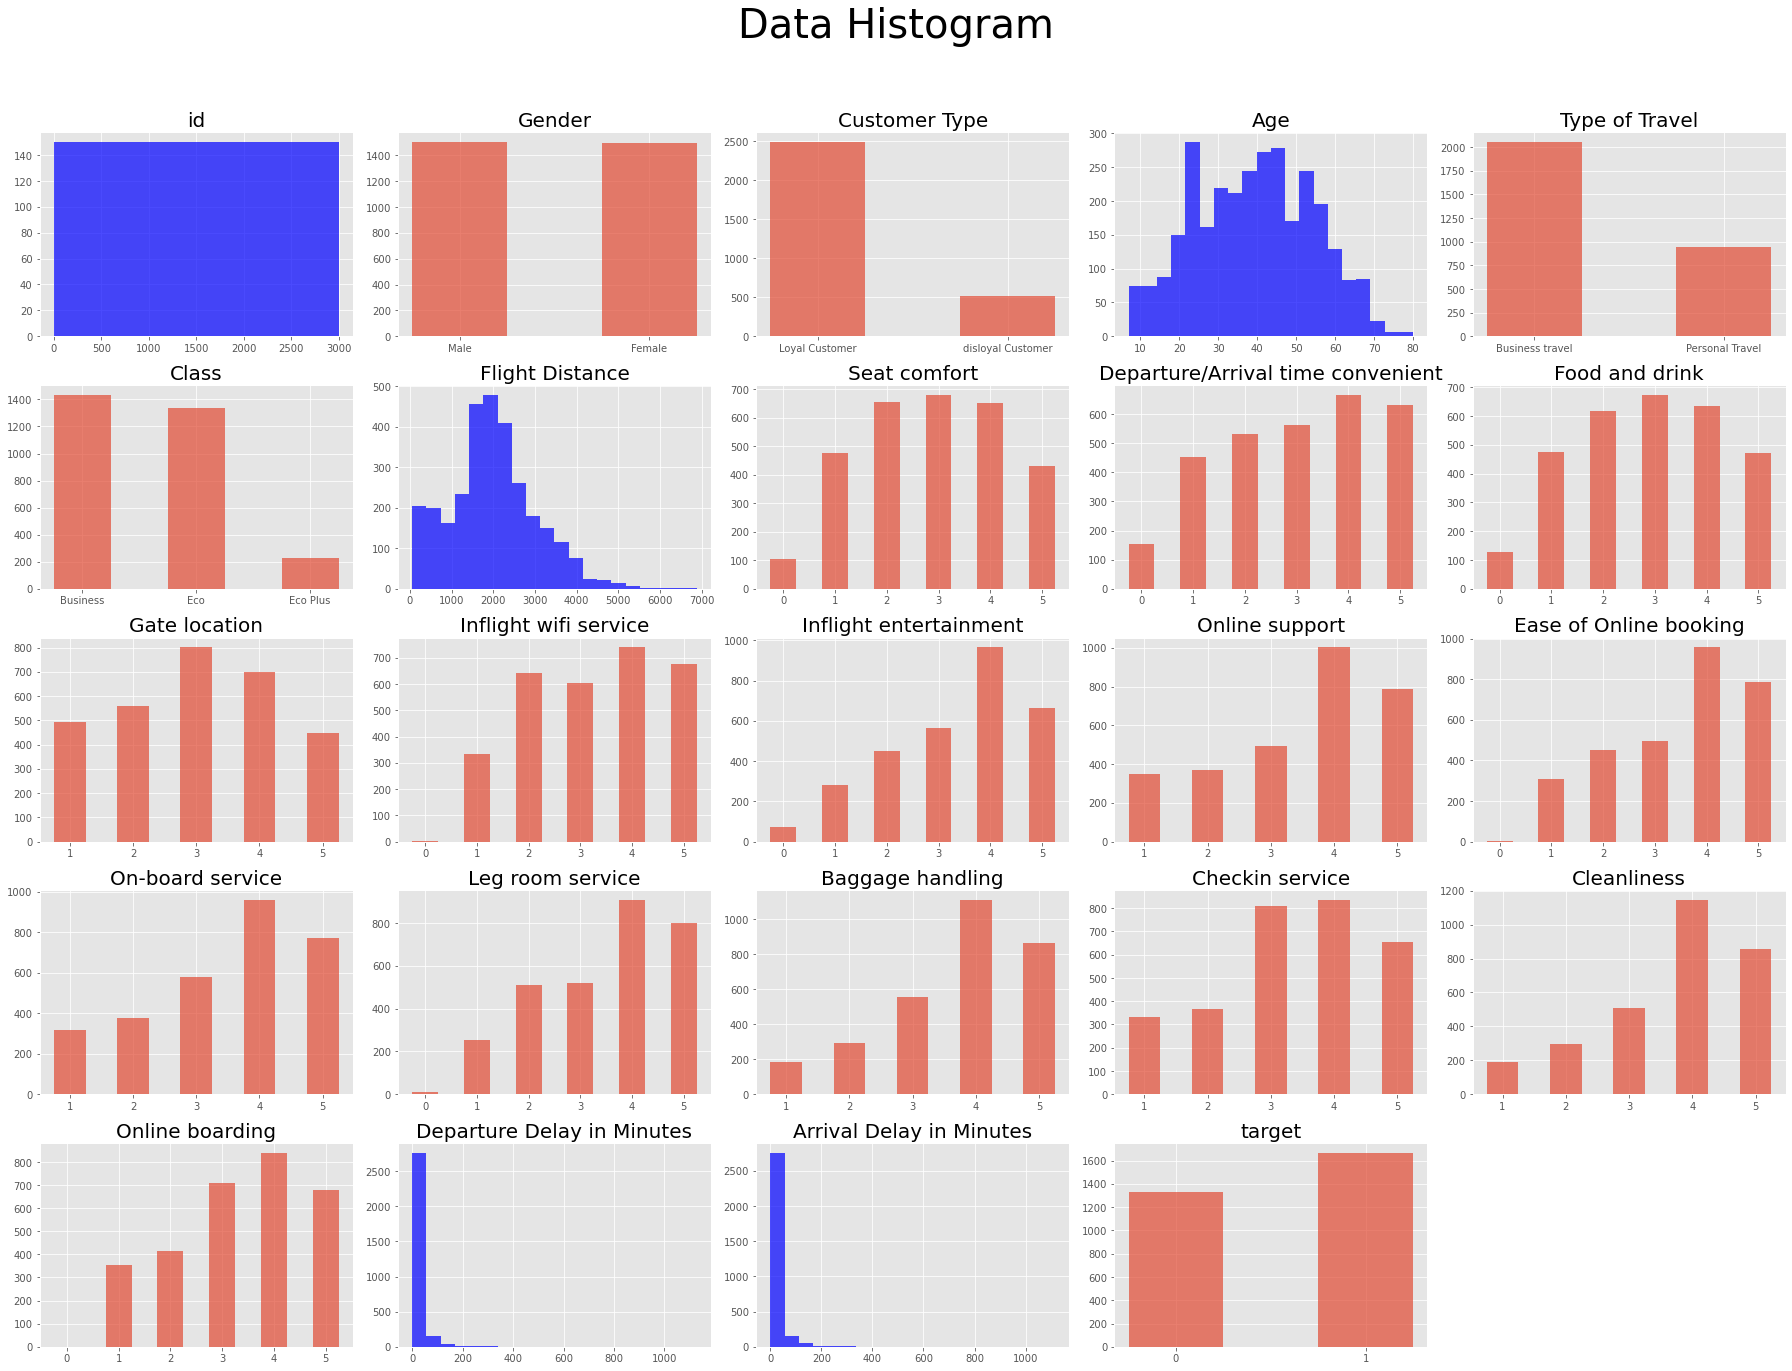

In [110]:
plt.style.use("ggplot")

# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(25,20))
plt.suptitle("Data Histogram", fontsize=40)

# id는 제외하고 시각화합니다.
cols = train.columns
for i in range(len(cols)):
    plt.subplot(5,5,i+1)
    plt.title(cols[i], fontsize=20)
    if len(train[cols[i]].unique()) > 20:
        plt.hist(train[cols[i]], bins=20, color='b', alpha=0.7)
    else:
        temp = train[cols[i]].value_counts()
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

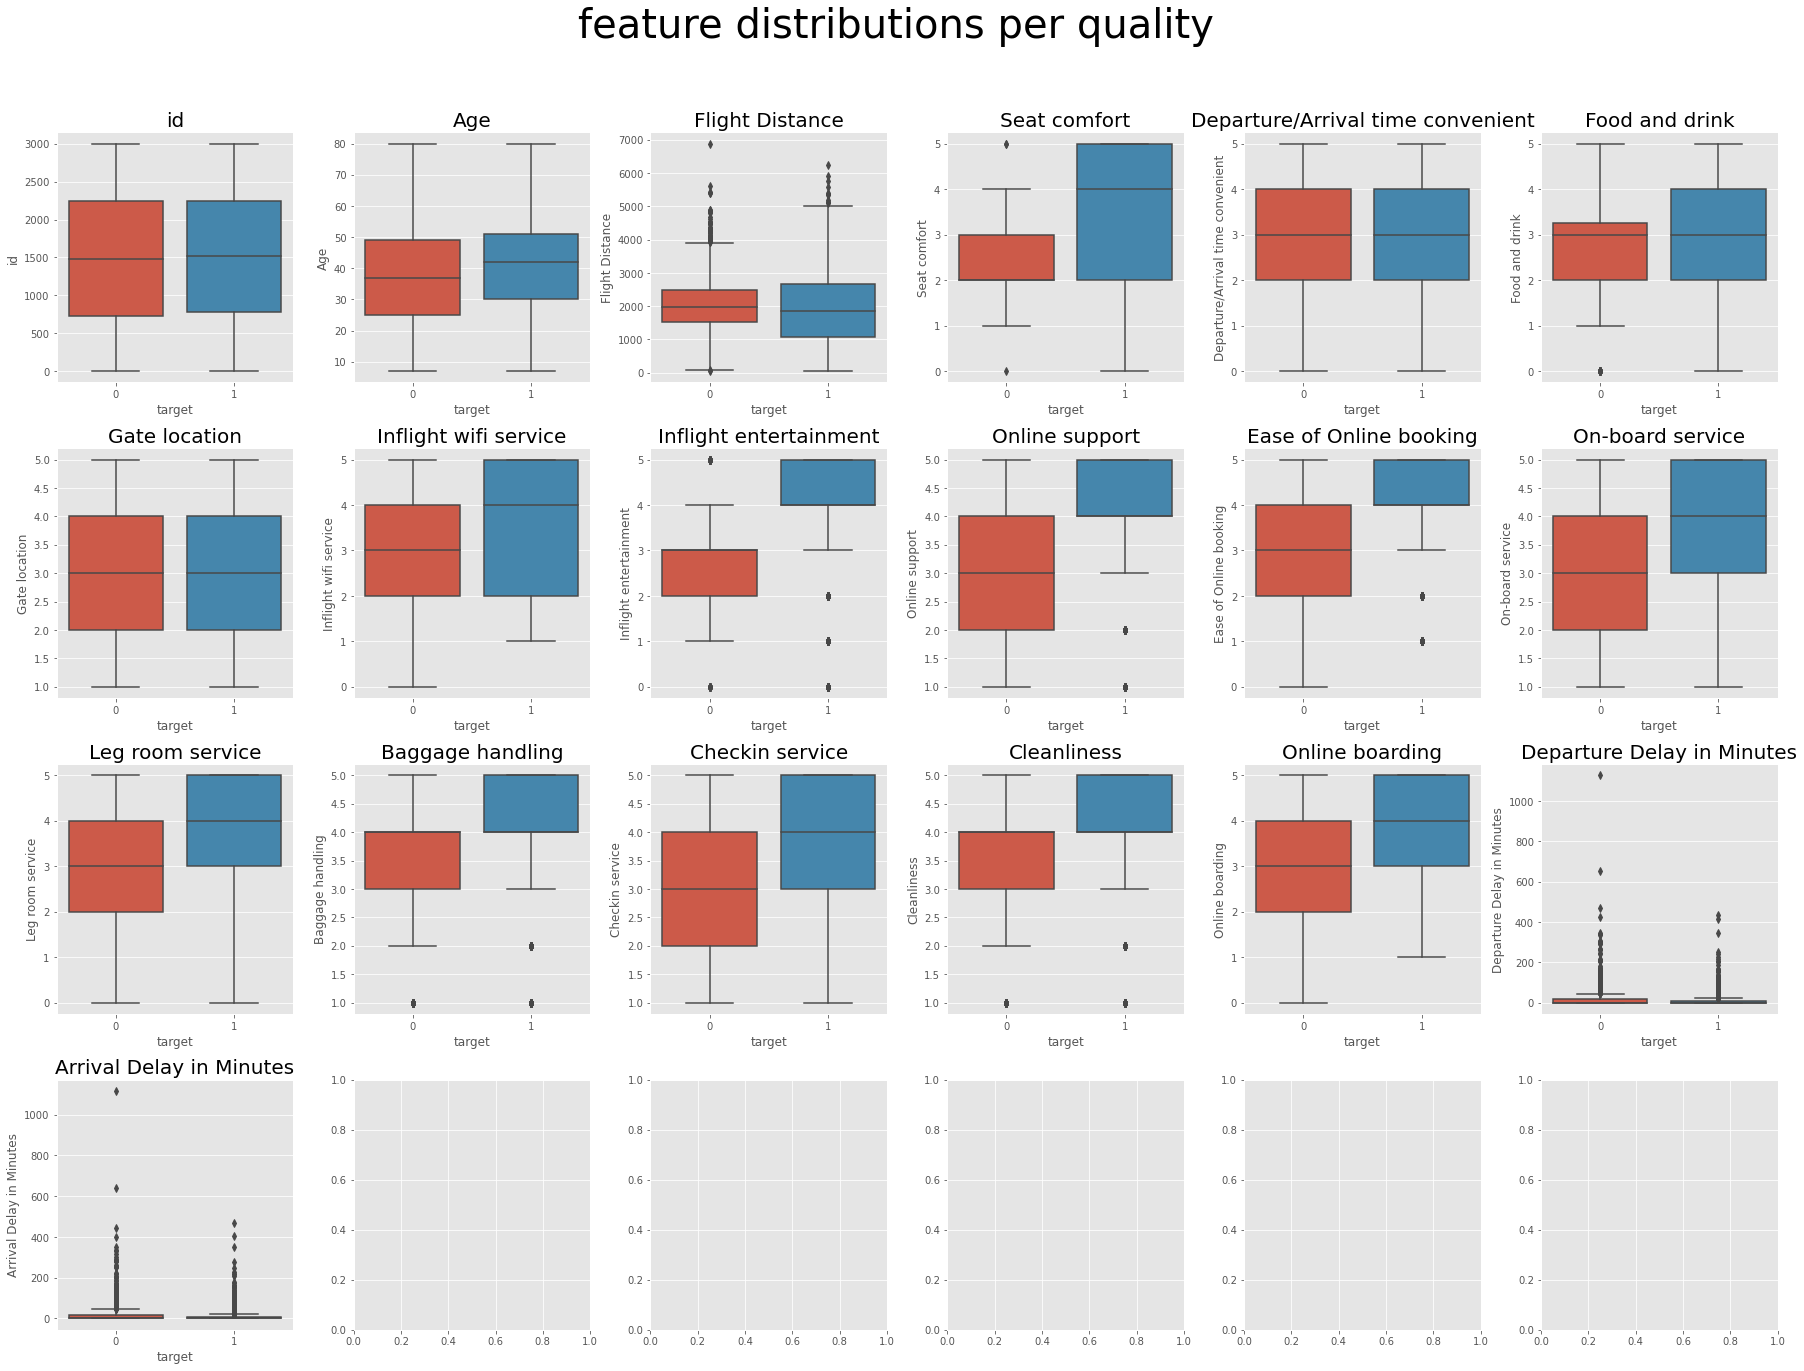

In [111]:
# 수치형 데이터 분리
numeric_feature = train.columns[(train.dtypes=='int64') | (train.dtypes=='float')]
num_data = train[numeric_feature]

# 박스플롯
fig, axes = plt.subplots(4, 6, figsize=(25, 20))

fig.suptitle('feature distributions per quality', fontsize= 40)
for ax, col in zip(axes.flat, num_data.columns[:-1]):
    sns.boxplot(x= 'target', y= col, ax=ax, data=num_data)
    ax.set_title(col, fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [112]:
numeric_feature = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
ordinal_feature = ['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 
           'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 
           'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']
categorical_feature = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

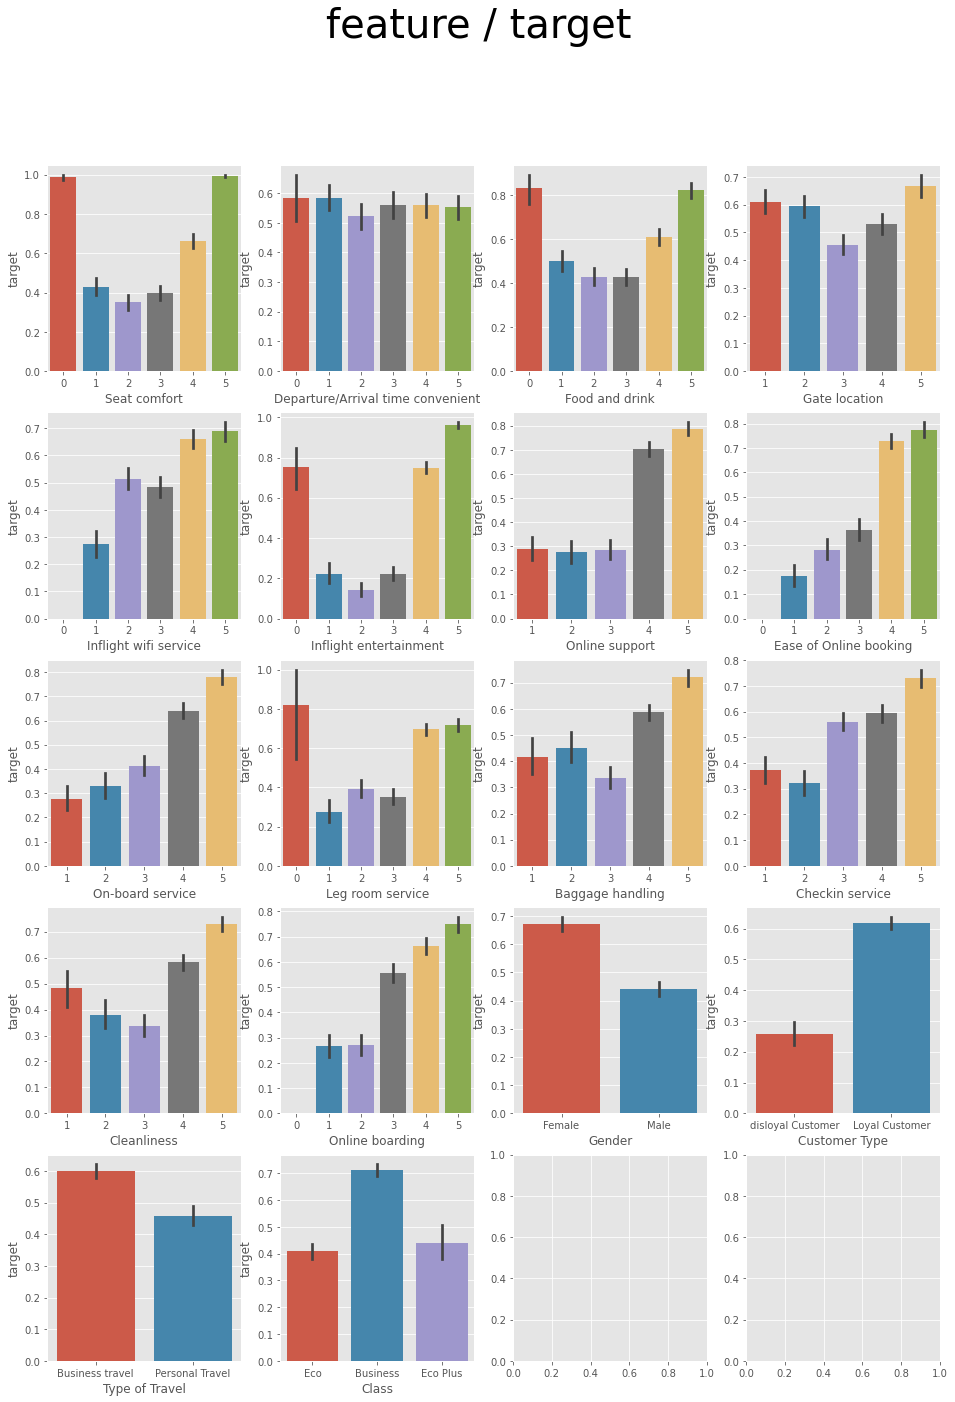

In [113]:
fig, ax = plt.subplots(5, 4, figsize = (16, 22))

plt.suptitle("feature / target", fontsize=40)

feature = ordinal_feature + categorical_feature

xvalue = 0
yvalue = 0

for xstr in feature:
    sns.barplot(x = xstr, y = 'target', data = train, ax = ax[yvalue][xvalue])
        
    if xvalue == 3:
        xvalue = 0
        yvalue += 1
    else:
        xvalue += 1

In [114]:
for xstr in numeric_feature:
    print(xstr, "Scew :", train[xstr].skew())

Age Scew : 0.0010456925943488839
Flight Distance Scew : 0.4509930169224059
Departure Delay in Minutes Scew : 9.190139679910239
Arrival Delay in Minutes Scew : 8.887761727831762


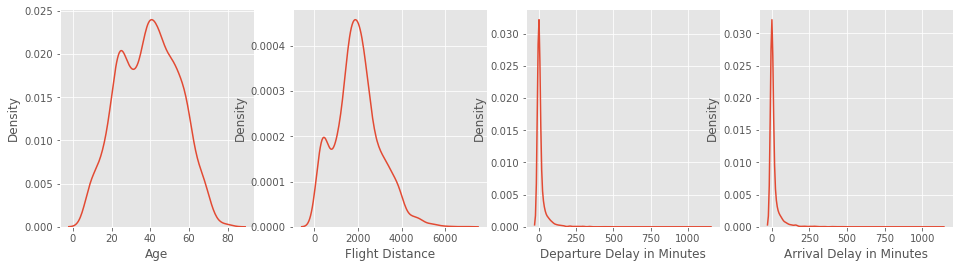

In [115]:
fig, ax = plt.subplots(1, 4, figsize = (16, 4))

for xint in range(4):
    sns.kdeplot(x = numeric_feature[xint], data = train, ax = ax[xint])

In [116]:
#log 변환 실행

train['Departure Delay in Minutes'] = np.log1p(train['Departure Delay in Minutes'])
train['Arrival Delay in Minutes'] = np.log1p(train['Arrival Delay in Minutes'])

#test 데이터에도 변환 실행

test['Departure Delay in Minutes'] = np.log1p(test['Departure Delay in Minutes'])
test['Arrival Delay in Minutes'] = np.log1p(test['Arrival Delay in Minutes'])

In [117]:
for xstr in numeric_feature:
    print(xstr, "Scew :", train[xstr].skew())

Age Scew : 0.0010456925943488839
Flight Distance Scew : 0.4509930169224059
Departure Delay in Minutes Scew : 0.9302111175258293
Arrival Delay in Minutes Scew : 0.8979015577156512


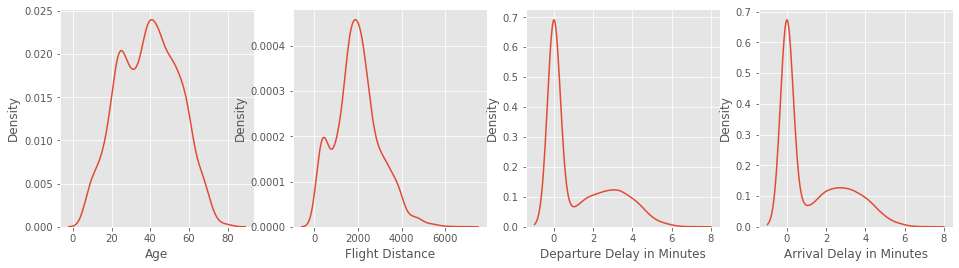

In [118]:
fig, ax = plt.subplots(1, 4, figsize = (16, 4))

for xint in range(4):
    sns.kdeplot(x = numeric_feature[xint], data = train, ax = ax[xint])

In [119]:
print("Train data missing value")
for feature in ordinal_feature:
    if len(train[train[feature] == 0]) > 0:
        print(feature, len(train[train[feature] == 0]))

print("=======================")
        
print("Test data missing value")
for feature in ordinal_feature:
    if len(test[test[feature] == 0]) > 0:
        print(feature, len(test[test[feature] == 0]))

Train data missing value
Seat comfort 106
Departure/Arrival time convenient 154
Food and drink 129
Inflight wifi service 2
Inflight entertainment 73
Ease of Online booking 1
Leg room service 11
Online boarding 1
Test data missing value
Seat comfort 64
Departure/Arrival time convenient 90
Food and drink 80
Inflight wifi service 1
Inflight entertainment 39
Leg room service 10


In [120]:
corr_matrix = train.corr()
corr_matrix["Online boarding"].sort_values(ascending=False)

Online boarding                      1.000000
Ease of Online booking               0.684511
Online support                       0.675139
Inflight wifi service                0.632049
Inflight entertainment               0.353772
target                               0.351370
Checkin service                      0.170082
Seat comfort                         0.152038
On-board service                     0.149112
Leg room service                     0.127926
Baggage handling                     0.094001
Cleanliness                          0.089846
Food and drink                       0.050461
Age                                  0.042943
Gate location                        0.039442
Departure/Arrival time convenient    0.028601
id                                   0.008078
Flight Distance                     -0.010123
Departure Delay in Minutes          -0.035189
Arrival Delay in Minutes            -0.042951
Name: Online boarding, dtype: float64

In [121]:
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

train["Ease of Online booking"][train["Ease of Online booking"] == 0] = 3
train["Online boarding"][train["Online boarding"] == 0] = 3

In [122]:
# for i in range(len(train)):
#     for feature in ordinal_feature:
#         if train[feature].iloc[i] == 0:
#             train[feature].iloc[i] = np.nan

# for i in range(len(test)):
#     for feature in ordinal_feature:
#         if test[feature].iloc[i] == 0:
#             test[feature].iloc[i] = np.nan

In [123]:
corr_matrix = train.corr()
corr_matrix["Inflight wifi service"].sort_values(ascending=False)[:5]

Inflight wifi service     1.000000
Online boarding           0.630844
Ease of Online booking    0.600852
Online support            0.563290
Inflight entertainment    0.274032
Name: Inflight wifi service, dtype: float64

In [ ]:
# import datawig

# target_feature = "Inflight wifi service"

# imputer = datawig.SimpleImputer(input_columns=['Online boarding', 'Ease of Online booking', 'Online support'],
#                                 output_column=target_feature)
# imputer.fit(train_df=train, num_epochs=50)

# null_train = train[train[target_feature].isnull()]
# null_imputed = imputer.predict(null_train)
# imputed_train = pd.DataFrame(null_imputed)

# n = 0
# for i in range(len(train)):
#     if np.isnan(train[target_feature].iloc[i]) == True:
#         train[target_feature].iloc[i] = int(round(imputed_train[target_feature+"_imputed"].iloc[n]))
#         n += 1
        
# null_train = test[test[target_feature].isnull()]
# null_imputed = imputer.predict(null_train)
# imputed_train = pd.DataFrame(null_imputed)

# n = 0
# for i in range(len(test)):
#     if np.isnan(test[target_feature].iloc[i]) == True:
#         test[target_feature].iloc[i] = int(round(imputed_train[target_feature+"_imputed"].iloc[n]))
#         n += 1

In [125]:
corr_matrix = train.corr()
corr_matrix["Inflight wifi service"].sort_values(ascending=False)[:5]

Inflight wifi service     1.000000
Online boarding           0.630844
Ease of Online booking    0.600852
Online support            0.563290
Inflight entertainment    0.274032
Name: Inflight wifi service, dtype: float64

In [ ]:
# import datawig

# target_feature = "Leg room service"

# imputer = datawig.SimpleImputer(input_columns=['Baggage handling', 'On-board service', 'Cleanliness'],
#                                 output_column=target_feature)
# imputer.fit(train_df=train, num_epochs=50)

# null_train = train[train[target_feature].isnull()]
# null_imputed = imputer.predict(null_train)
# imputed_train = pd.DataFrame(null_imputed)

# n = 0
# for i in range(len(train)):
#     if np.isnan(train[target_feature].iloc[i]) == True:
#         train[target_feature].iloc[i] = int(round(imputed_train[target_feature+"_imputed"].iloc[n]))
#         n += 1
        
# null_train = test[test[target_feature].isnull()]
# null_imputed = imputer.predict(null_train)
# imputed_train = pd.DataFrame(null_imputed)

# n = 0
# for i in range(len(test)):
#     if np.isnan(test[target_feature].iloc[i]) == True:
#         test[target_feature].iloc[i] = int(round(imputed_train[target_feature+"_imputed"].iloc[n]))
#         n += 1

In [126]:
for feature in ordinal_feature:
    if train[feature].isnull().sum() > 0:
        print(feature, train[feature].isnull().sum())
print("================")
for feature in ordinal_feature:
    if test[feature].isnull().sum() > 0:
        print(feature, test[feature].isnull().sum())

In [127]:
train['Delayed'] = (train['Departure Delay in Minutes'] 
                         + train['Arrival Delay in Minutes']).apply(lambda x : 0 if x > 0 else 1)
test['Delayed'] = (test['Departure Delay in Minutes'] 
                         + test['Arrival Delay in Minutes']).apply(lambda x : 0 if x > 0 else 1)

In [128]:
corr_matrix = train.corr()
corr_matrix["target"].sort_values(ascending=False)

target                               1.000000
Inflight entertainment               0.522935
Ease of Online booking               0.447450
Online support                       0.411944
On-board service                     0.359699
Online boarding                      0.350895
Leg room service                     0.311086
Seat comfort                         0.271270
Checkin service                      0.248975
Inflight wifi service                0.242427
Cleanliness                          0.234848
Baggage handling                     0.232302
Food and drink                       0.145126
Age                                  0.107226
Delayed                              0.097188
id                                   0.007544
Gate location                        0.003213
Departure/Arrival time convenient   -0.010653
Flight Distance                     -0.052059
Departure Delay in Minutes          -0.105554
Arrival Delay in Minutes            -0.142003
Name: target, dtype: float64

In [129]:
train = train.drop(['Food and drink', 'Departure/Arrival time convenient', 'Departure Delay in Minutes', 'id'], axis = 1)
test = test.drop(['Food and drink', 'Departure/Arrival time convenient', 'Departure Delay in Minutes', 'id'], axis = 1)

In [130]:
cols = train.columns
cate_cols = []
for col in cols:
    if train[col].dtypes == 'O':
        cate_cols.append(col)
for col in cate_cols:
    tar = list(train[col].unique())
    enc_dict = dict(zip(tar, [i for i in range(len(tar))]))
    train[col] = train[col].apply(lambda x: enc_dict[x])
    test[col] = test[col].apply(lambda x: enc_dict[x])

In [131]:
train = train.dropna().reset_index(drop=True)

In [132]:
# 로지스틱 회귀분석 테스트
# 의사결정나무 모델
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix
model = DecisionTreeClassifier()
model.fit(train.drop(['target'], axis = 1), list(train.target))
print(classification_report(train.target, model.predict(train.drop(['target'], axis=1))))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1332
           1       1.00      1.00      1.00      1668

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [133]:
# 정답파일 작성
predict = pd.read_csv(Path_R + '\\sample_submission.csv')
predict.target = model.predict(test)
predict.to_csv(Path_R + '\\sample_submission(DT).csv', index = False)
pd.read_csv(Path_R + '\\sample_submission(DT).csv').head()

,id,target
0,1,1
1,2,0
2,3,1
3,4,0
4,5,1
